Necessary imports for displaying points, boxes, and masks.

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import cv2
import glob
from ultralytics import YOLO

In [11]:
input_names = glob.glob("/home/zfei/codes/data/sim_sb/*")
input_names.sort()
# Load a model
model = YOLO('/home/zfei/codes/models/segment.pt')  # load a custom model
output_dir = "/home/zfei/codes/data/temp/"
for image in input_names:
    base_name = os.path.basename(image)
    # Predict with the model
    results = model(image)  # predict on an image
    # print(results[0].masks)
    res = results[0].plot()
    cv2.imwrite(output_dir + base_name, res)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))   #转换色调，BGR到RGB




image 1/1 /home/zfei/codes/data/sim_sb/000000000.png: 480x640 3 ripes, 3.3ms
Speed: 0.9ms preprocess, 3.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/zfei/codes/data/sim_sb/000000003.png: 480x640 3 ripes, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/zfei/codes/data/sim_sb/000000006.png: 480x640 3 ripes, 3.1ms
Speed: 0.9ms preprocess, 3.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/zfei/codes/data/sim_sb/000000009.png: 480x640 3 ripes, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/zfei/codes/data/sim_sb/000000012.png: 480x640 3 ripes, 1 unripe, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/zfei/codes/data/sim_sb/000000015.png: 480x640 3 ripes, 1 unripe, 3.1ms
Speed: 0.6ms preprocess, 3.1ms i

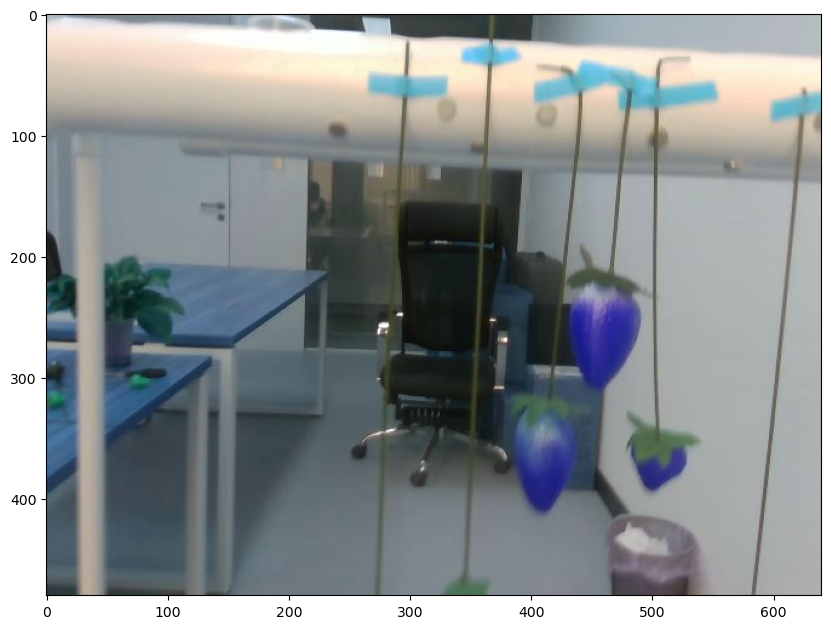

In [2]:

image = cv2.imread('/home/zfei/codes/data/sim_sb/000000000.png')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

use the model to predict on an example image


image 1/1 /home/zfei/codes/data/sim_sb/000000369.png: 480x640 3 ripes, 3.2ms
Speed: 0.7ms preprocess, 3.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


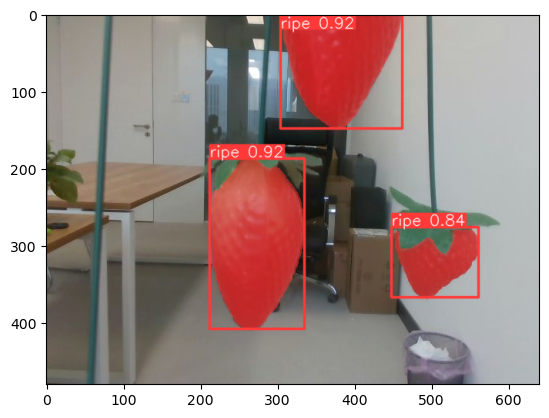

In [78]:
# Load a model
model = YOLO('/home/zfei/codes/models/segment.pt')  # load a custom model

# Predict with the model
results = model(image)  # predict on an image

# print(results[0].masks)
res = results[0].plot()

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))   #转换色调，BGR到RGB

In [79]:
for result in results:
    for idx, obj in enumerate(result):
        #  Get detection class name
        label = obj.names[obj.boxes.cls.tolist().pop()]
        print(label)

ripe
ripe
ripe


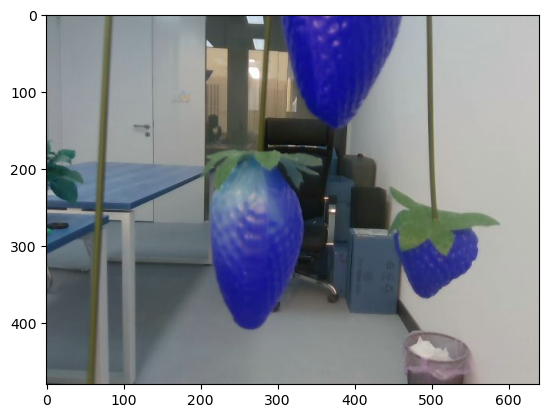

In [80]:
result = results[0]
obj = result[0]
seg_img = np.copy(result.orig_img)
plt.imshow(seg_img)

In [81]:
contour = obj.masks.xy[0]
contour = contour.astype(np.int32)
seg_img[contour[:, 1], contour[:, 0]] = [255, 0, 0]
contour = contour.reshape(-1, 1, 2)
contour.shape

(165, 1, 2)

In [87]:
mask = np.zeros([seg_img.shape[0], seg_img.shape[1]])
_ = cv2.drawContours(mask,
                [contour],
                -1,
                1,
                cv2.FILLED)

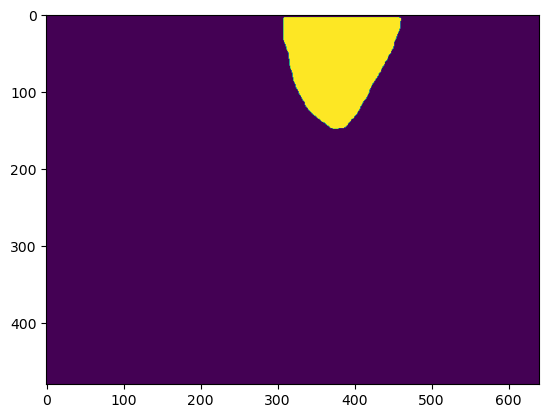

In [88]:
plt.imshow(mask)

In [89]:
mask

array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]])

In [90]:
obj_seg = np.where(mask==1)



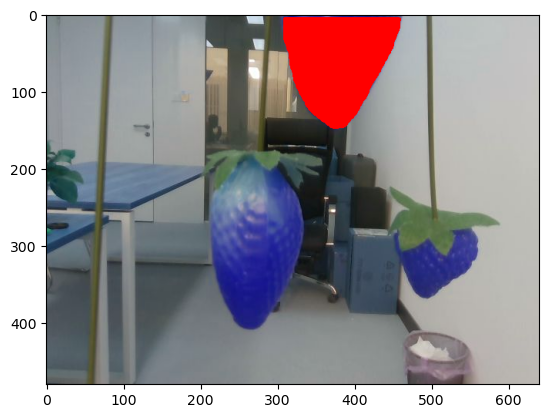

In [92]:
seg_img[obj_seg] = [255, 0, 0]
plt.imshow(seg_img)

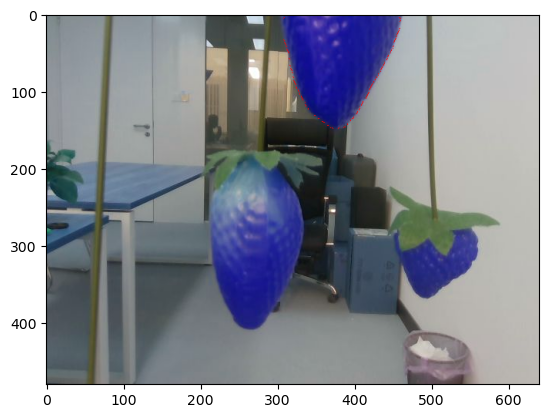

In [64]:
plt.imshow(seg_img)

In [20]:
obj.masks.__attribute__

AttributeError: 'Masks' object has no attribute '__attribute__'. See valid attributes below.

    A class for storing and manipulating detection masks.

    Attributes:
        xy (list): A list of segments in pixel coordinates.
        xyn (list): A list of normalized segments.

    Methods:
        cpu(): Returns the masks tensor on CPU memory.
        numpy(): Returns the masks tensor as a numpy array.
        cuda(): Returns the masks tensor on GPU memory.
        to(device, dtype): Returns the masks tensor with the specified device and dtype.
    